In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('walmart.csv')

In [3]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## EDA for the features and Target 

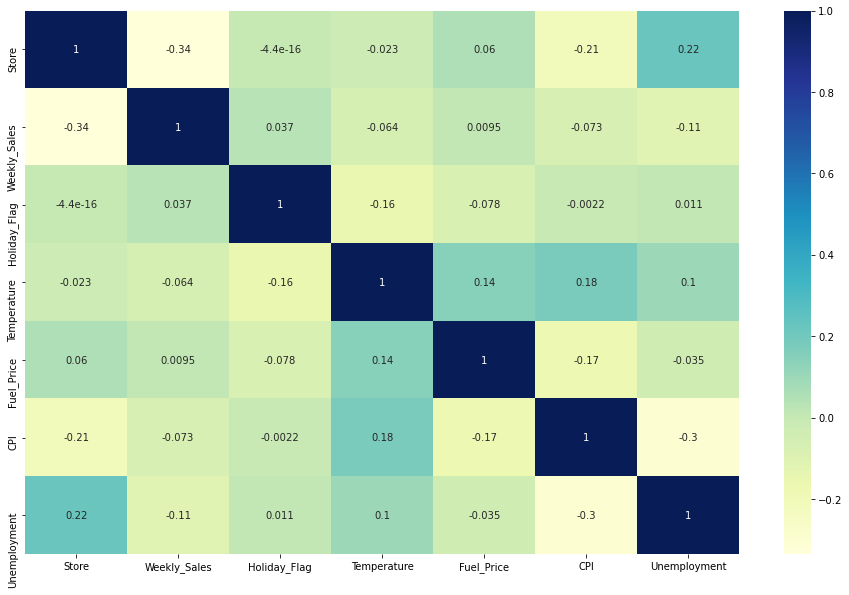

In [6]:
#correlation map
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

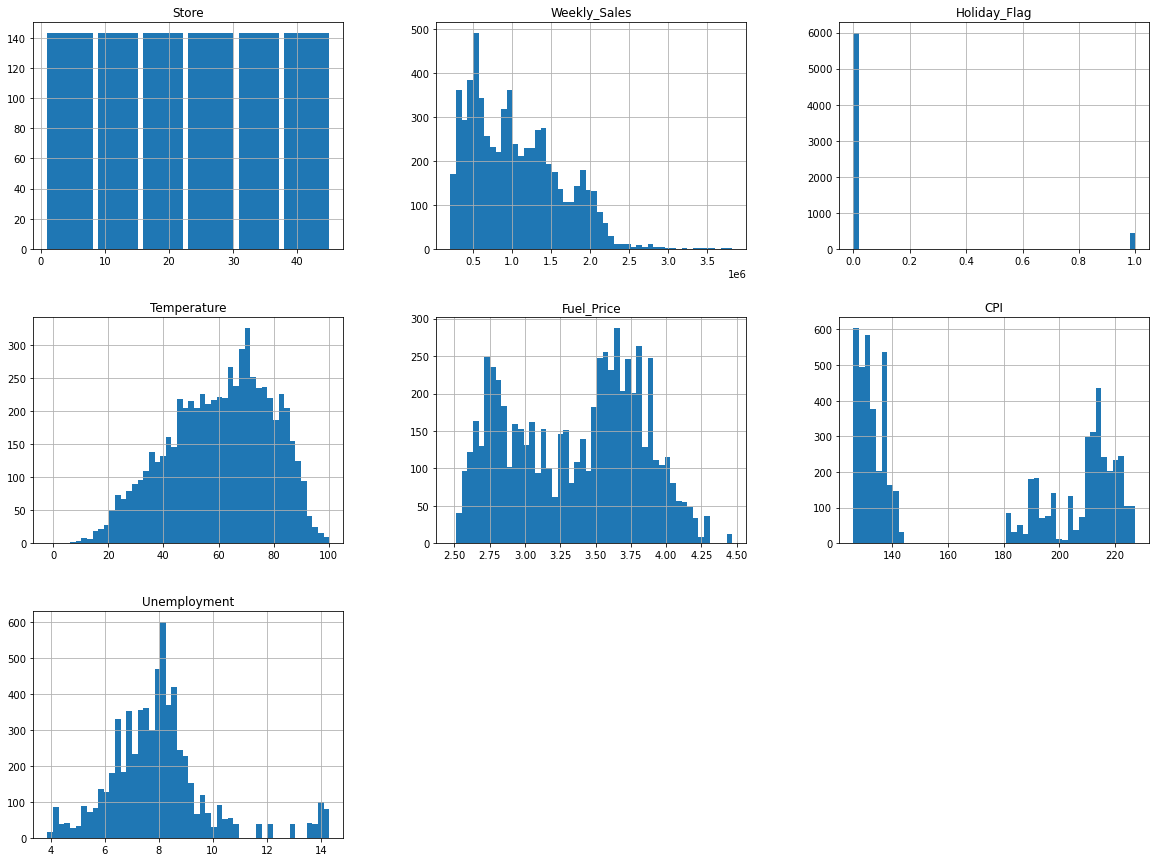

In [7]:
#lets graph the median distrbution 
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# convert object to datetime
dataset.Date = pd.to_datetime(dataset.Date)
dataset['dayofweek'] = dataset.Date.dt.dayofweek
dataset['month'] = dataset.Date.dt.month
dataset['year'] = dataset.Date.dt.year
dataset.drop(['Date'], axis=1, inplace=True)
dataset.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,dayofweek,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


<AxesSubplot:>

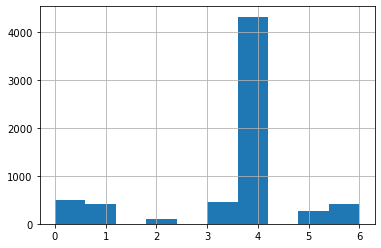

In [9]:
dataset['dayofweek'].hist()

<AxesSubplot:xlabel='Fuel_Price'>

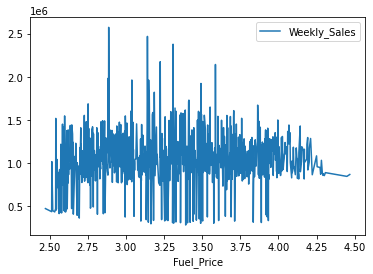

In [10]:
#weekly sales with fuel price distrbution 
fuel_price = pd.pivot_table(dataset, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

## Removing outliers 

C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LEN0

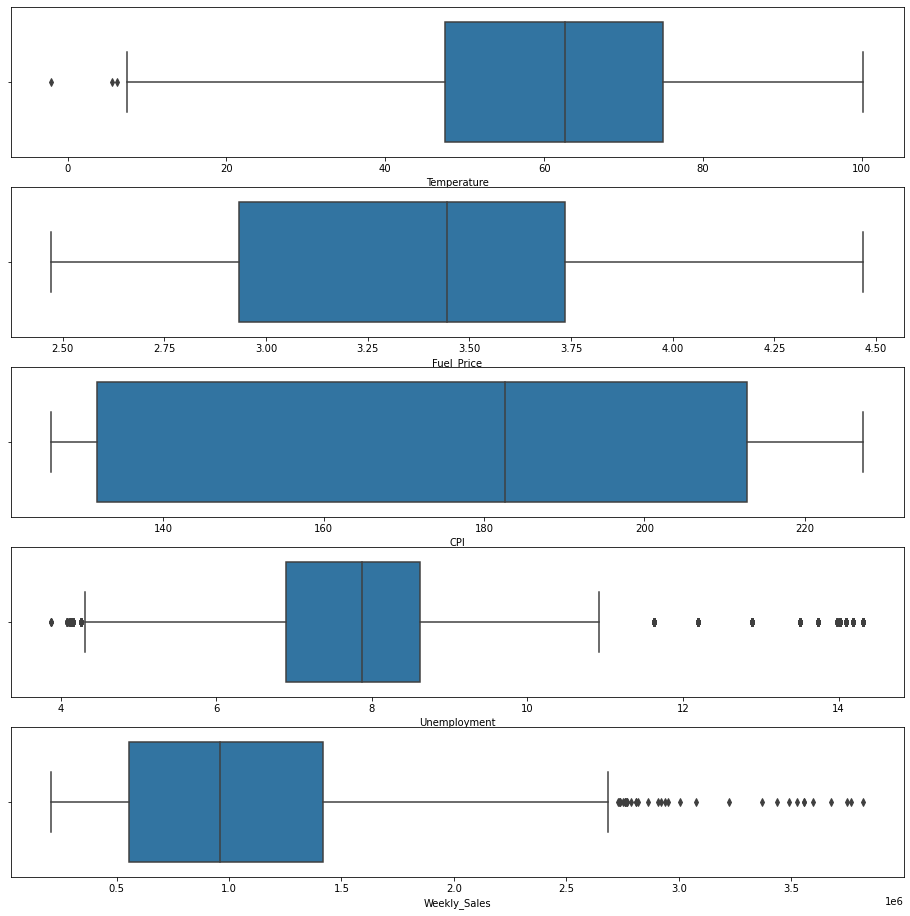

In [11]:
#Detecting outliers :
fig, axis = plt.subplots(5,figsize=(16,16))
Z = dataset[['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']]
for i,column in enumerate(Z):
    sns.boxplot(dataset[column],ax=axis[i])
    
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Dropping outliers     
dataset = dataset[(dataset['Unemployment']<10) & (dataset['Unemployment']>4.5) & (dataset['Temperature']>10) & (dataset['Weekly_Sales']<2500000)]
dataset

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,dayofweek,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,3,5,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,0,12,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,10,2012


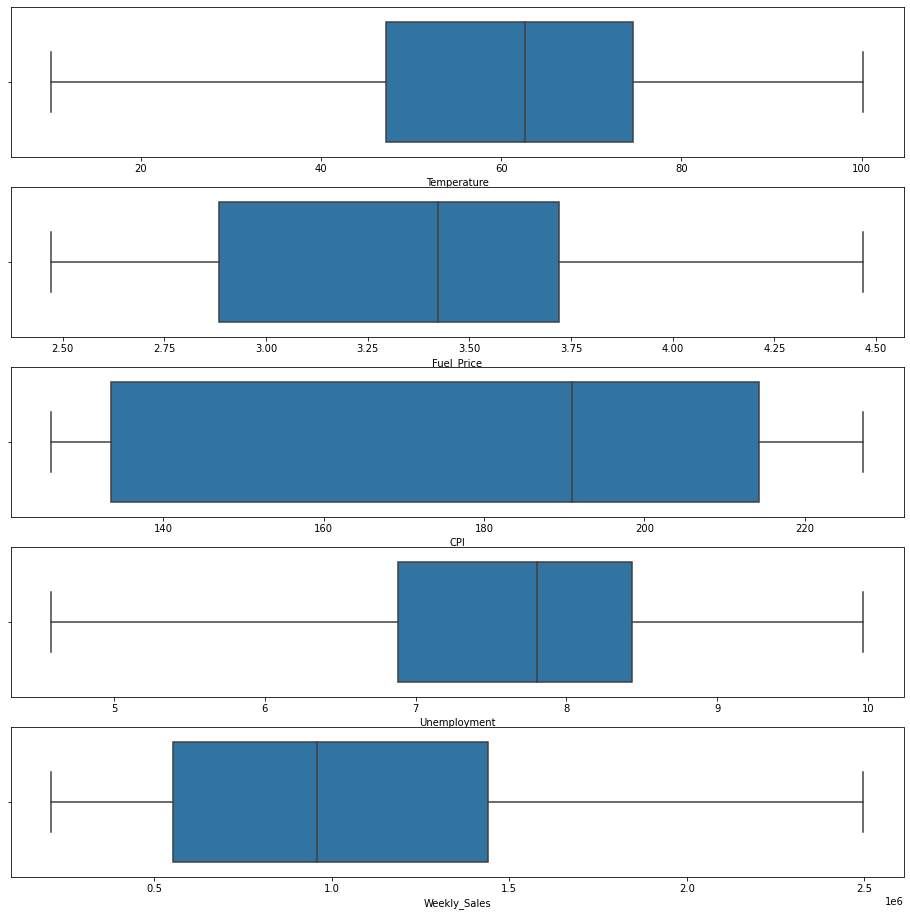

In [13]:
# confirming removing the outliers 
fig, axis = plt.subplots(5,figsize=(16,16))
Z = dataset[['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']]
for i,column in enumerate(Z):
    sns.boxplot(dataset[column], ax=axis[i])

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5608 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5608 non-null   int64  
 1   Weekly_Sales  5608 non-null   float64
 2   Holiday_Flag  5608 non-null   int64  
 3   Temperature   5608 non-null   float64
 4   Fuel_Price    5608 non-null   float64
 5   CPI           5608 non-null   float64
 6   Unemployment  5608 non-null   float64
 7   dayofweek     5608 non-null   int64  
 8   month         5608 non-null   int64  
 9   year          5608 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 481.9 KB


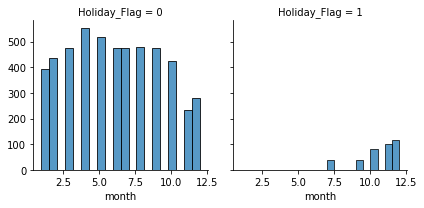

In [15]:
g = sns.FacetGrid(dataset, col="Holiday_Flag")
g.map(sns.histplot, "month")

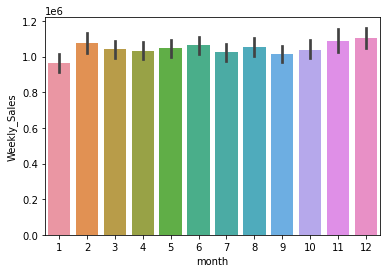

In [16]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=dataset)

### pre processing 

In [17]:
# converting stores numbers into dummy variable
Feature = dataset.drop(['Weekly_Sales','Store'], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(dataset['Store'])], axis=1)
Feature.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,dayofweek,month,year,1,2,...,35,36,37,39,40,41,42,43,44,45
0,0,42.31,2.572,211.096358,8.106,6,5,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38.51,2.548,211.242170,8.106,3,12,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,39.93,2.514,211.289143,8.106,4,2,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,46.63,2.561,211.319643,8.106,4,2,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,46.50,2.625,211.350143,8.106,0,5,2010,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = Feature
Y = dataset.iloc[:,1]

In [19]:
print(X)
print(Y)

      Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0                0        42.31       2.572  211.096358         8.106   
1                1        38.51       2.548  211.242170         8.106   
2                0        39.93       2.514  211.289143         8.106   
3                0        46.63       2.561  211.319643         8.106   
4                0        46.50       2.625  211.350143         8.106   
...            ...          ...         ...         ...           ...   
6430             0        64.88       3.997  192.013558         8.684   
6431             0        64.89       3.985  192.170412         8.667   
6432             0        54.47       4.000  192.327265         8.667   
6433             0        56.47       3.969  192.330854         8.667   
6434             0        58.85       3.882  192.308899         8.667   

      dayofweek  month  year  1  2  ...  35  36  37  39  40  41  42  43  44  \
0             6      5  2010  1  0  ...   0 

### Train Test & Scale 

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
print(X_train)

[[-0.26621009  0.2440147   0.43379334 ... -0.12030113 -0.16001422
  -0.16195732]
 [-0.26621009 -1.59463152  0.07237568 ... -0.12030113 -0.16001422
  -0.16195732]
 [-0.26621009 -0.13262186 -1.1882317  ... -0.12030113 -0.16001422
  -0.16195732]
 ...
 [-0.26621009  0.23081867  1.04994513 ... -0.12030113 -0.16001422
  -0.16195732]
 [-0.26621009 -1.07008951  1.10872993 ... -0.12030113 -0.16001422
  -0.16195732]
 [-0.26621009 -0.04409853 -0.09091543 ... -0.12030113 -0.16001422
  -0.16195732]]


In [23]:
X_train.shape

(5047, 50)

In [24]:
X_test.shape

(561, 50)

#### Evaluation metrics 

In [25]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [27]:
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)
print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87271.28314659592
MSE: 19653895261.796368
RMSE: 140192.35093897372
R2 Square 0.9367171766235523
__________________________________
Train set evaluation:
_____________________________________
MAE: 81566.25494693119
MSE: 15292049420.168428
RMSE: 123661.02627816262
R2 Square 0.9493312151487244
__________________________________


In [28]:
print(lin_reg.coef_)

[ 7.97724408e+03 -1.11620604e+04  7.25750673e+03  4.38039754e+05
 -4.54263072e+04 -8.54596297e+03  1.34384697e+04 -6.23075530e+04
 -3.57825801e+16 -3.53780820e+16 -3.55134830e+16 -3.00563485e+16
 -3.61820583e+16 -3.60494463e+16 -3.53780820e+16 -3.60494463e+16
 -3.65766809e+16 -3.52421039e+16 -3.59162890e+16 -3.48306396e+16
 -3.32738046e+16 -3.52421039e+16 -3.55134830e+16 -3.64456697e+16
 -3.60494463e+16 -3.39911817e+16 -3.46922849e+16 -3.51055420e+16
 -3.51055420e+16 -2.73304048e+16 -3.56483136e+16 -3.53780820e+16
 -3.53780820e+16 -3.46922849e+16 -2.66023028e+16 -3.45533183e+16
 -3.56483136e+16 -3.52421039e+16 -3.49683896e+16 -2.58524642e+16
 -3.59162890e+16 -3.67071699e+16 -3.51055420e+16 -3.63141308e+16
 -2.80384635e+16 -3.56483136e+16 -3.56483136e+16 -2.67862959e+16
 -3.52421039e+16 -3.56483136e+16]


In [29]:
# checking the intercept
print(lin_reg.intercept_)

1041056.2690853938


In [30]:
# cheking the paramas
lin_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

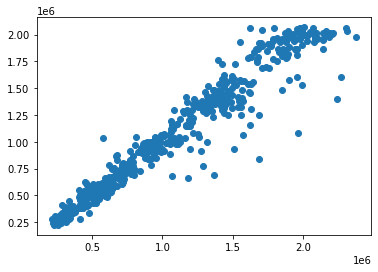

In [31]:
# plotting ytest with ypredict
plt.scatter(Y_test,test_pred)

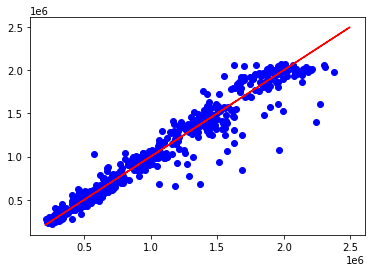

In [32]:
# plotting ytest with ypredict and the fitted line
predictArray_lin = lin_reg.predict(X_test)
plt.scatter(Y_test,predictArray_lin, color="b")
plt.plot(Y,Y, color="r")

In [33]:
Error = Y_test - test_pred
Error

774     -70424.638310
5853    218036.401690
4173     12036.611690
4133    -24772.208310
2745    -81419.888310
            ...      
5758   -144003.888310
1858     39451.211690
5790     45487.661690
6314    -21315.345143
5624   -233492.148310
Name: Weekly_Sales, Length: 561, dtype: float64

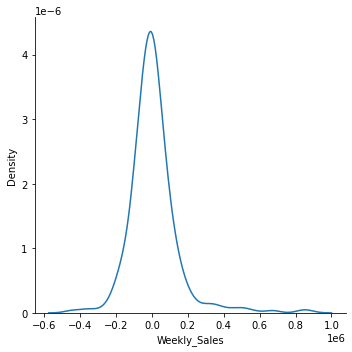

In [34]:
# plotting the errors
sns.displot(Error,kind = 'kde')

#### validation 

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, Y_train, scoring='r2', cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.01


In [37]:
from sklearn.linear_model import Ridge

modelridge = Ridge(alpha=10, solver='cholesky', tol=0.001, random_state=42)
modelridge.fit(X_train, Y_train)


test_pred = modelridge.predict(X_test)
train_pred = modelridge.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87525.97003087513
MSE: 19972238364.495617
RMSE: 141323.16994921822
R2 Square 0.9356921558796804
__________________________________
Train set evaluation:
_____________________________________
MAE: 81413.28016176337
MSE: 15438721136.279015
RMSE: 124252.65041953437
R2 Square 0.9488452320457943
__________________________________


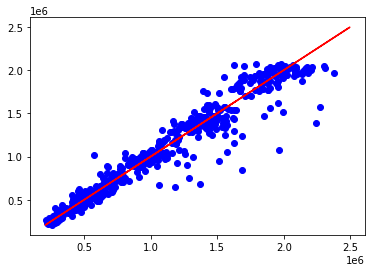

In [38]:
predictArray_lin = modelridge.predict(X_test)
plt.scatter(Y_test,predictArray_lin, color="b")
plt.plot(Y,Y, color="r")

In [39]:
from sklearn.linear_model import Lasso

model2 = Lasso(alpha=0.1, 
              precompute=True, 
 
              positive=True, 
              selection='random',
              random_state=42)
model2.fit(X_train, Y_train)

test_pred = model2.predict(X_test)
train_pred = model2.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87350.40972013283
MSE: 20422398623.284584
RMSE: 142906.95792467415
R2 Square 0.9342427021317807
__________________________________
Train set evaluation:
_____________________________________
MAE: 81602.27570761013
MSE: 15910117466.280811
RMSE: 126135.31411258629
R2 Square 0.9472833041074081
__________________________________


In [40]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3 ,penalty=None,eta0=0.0001)
sgd_reg.fit(X_train , Y_train)
test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87599.8628090775
MSE: 20154205309.62161
RMSE: 141965.50746438943
R2 Square 0.9351062474938173
__________________________________
Train set evaluation:
_____________________________________
MAE: 81419.71048669098
MSE: 15589024051.750093
RMSE: 124856.01327829626
R2 Square 0.9483472173011859
__________________________________


In [41]:
from sklearn.linear_model import ElasticNet

model3 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model3.fit(X_train, Y_train)

test_pred = model3.predict(X_test)
train_pred = model3.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87606.86026799717
MSE: 20059961840.75159
RMSE: 141633.19469937685
R2 Square 0.9354096984237955
__________________________________
Train set evaluation:
_____________________________________
MAE: 81438.7358243921
MSE: 15545901752.960627
RMSE: 124683.20557701678
R2 Square 0.9484900990313989
__________________________________


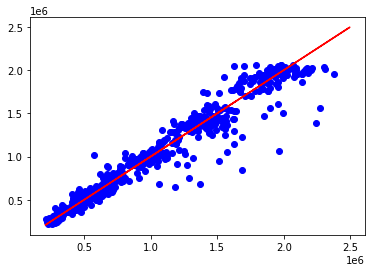

In [42]:
predictArray_lin = model3.predict(X_test)
plt.scatter(Y_test,predictArray_lin, color="b")
plt.plot(Y,Y, color="r")

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3, X_train, Y_train, scoring='r2', cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.01
